### Assignment 5

We have now covered the perceptron, Adaline, and logistic regression.

When using gradient descent, the only difference between these algorithms is how $\hat{y}$ is computed.

In this file create one method called `fit_linear()` that takes as a parameter a value called `algorithm`.

If `algorithm="perceptron"` then `fit_linear()` fits the data with a perceptron.

If `algorithm="adaline"` then `fit_linear()` fits the data with Adaline.

If `algorithm="logreg"` then `fit_linear()` fits the data with logistic regression.

The default value of `algorithm` is `logreg`. 

The `fit_linear` can use batch, stochastic, or mini-batch gradient descent (your choice). 

You do not have to implement all 3. 

### Task

Once you have the method written, load the [Raisin](https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset) dataset provided in this folder.

Produce `X` and `y` as usual and use `sklearn` to do a train-test split and scale the data.

Then fit a linear model to the training set and check your accuracy on the test set.

Which of the three algorithms performs best?

### Extra credit

If you are feeling ambitious, you can add regularization to your model, and a hyperparameter to control it.

This is not as hard as it sounds.  

Probably a properly tuned model with regularization will beat all three of the unregularized linear models. 

This extra credit is worth five points on the midterm.

In [104]:
import pandas as pd
import numpy as np

df = pd.read_csv("Raisin_Dataset/Raisin_Dataset.csv")
df["class"].unique()

array(['Kecimen', 'Besni'], dtype=object)

In [105]:
y = df["class"].replace(['Kecimen', 'Besni'],[-1,1]).values
X=df.loc[:,"area":"perimeter"].values

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test = train_test_split(X,y)
#X_train.shape,X_test.shape,y_train.shape,y_test.shape

scl = StandardScaler()
scl.fit(X_train)

X_train_std = scl.transform(X_train)
X_test_std = scl.transform(X_test)

X_train_std = np.c_[np.ones(X_train.shape[0]),X_train_std]
X_test_std = np.c_[np.ones(X_test.shape[0]),X_test_std]



In [106]:
def fit_linear(X,y,algorithm="perceptron",eta=0.1,max_epochs=100,alpha=0):
    assert algorithm in ["perceptron","adaline","logreg"]
    if algorithm=="perceptron":
        assert set(y) == set([-1,1])
        phi = lambda z: (z>0)*2 -1 
    elif algorithm=="logreg":
        if set(y) == set([-1,1]):
            y = (y+1)/2  ## make set(y) == {0,1}
        phi = lambda z: 1/(1+np.exp(-z))
    else:  ## adaline
        assert set(y) == set([-1,1])
        phi = lambda z: z
    w = np.random.randn(X.shape[1])/10
    for _ in range(max_epochs):
        yhat = phi(X@w)
        grad = (y-yhat)@X/X.shape[0]+ alpha*w ## alpha*w is l2 regularization
        w += eta*grad
    return w

def predict_linear(X,w,algorithm="perceptron"):
    assert algorithm in ["perceptron","adaline","logreg"]
    if algorithm=="perceptron" or algorithm=='adaline':
        phi = lambda z: (z>0)*2 -1 
        return phi(X@w)
    elif algorithm=="logreg":
        phi = lambda z: (1/(1+np.exp(-z)) >0.5)*1
        yhat =  phi(X@w)
        return yhat*2-1

    



In [107]:
records = {a:[] for a in ["perceptron","adaline","logreg"]}

for i in range(100):
    for alg in ["perceptron","adaline","logreg"]:
        w=fit_linear(X_train_std,y_train,eta=.1,max_epochs=100,algorithm=alg)
        yhat = predict_linear(X_test_std,w,algorithm=alg)
        acc = (yhat==y_test).sum()/len(y_test)
        
        records[alg].append(acc)

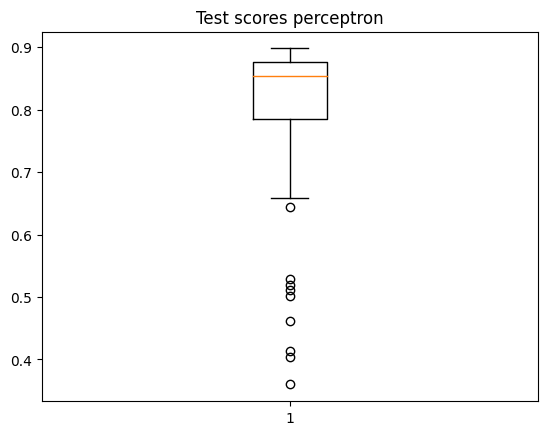

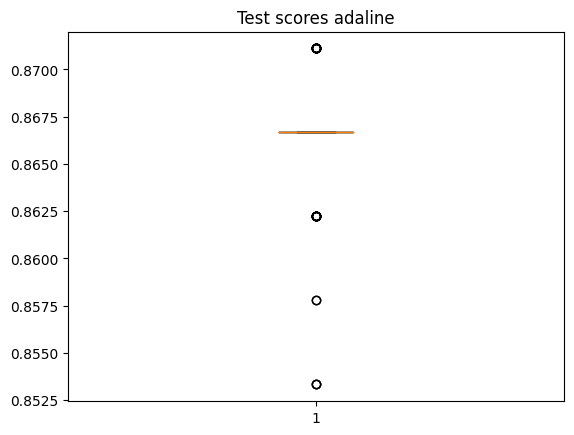

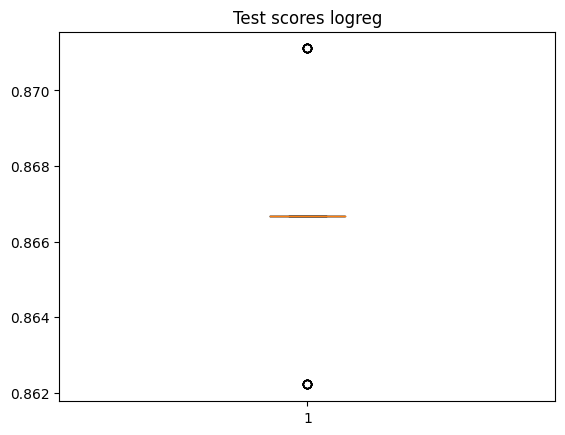

In [108]:
import matplotlib.pyplot as plt
for alg in ["perceptron","adaline","logreg"]:
    plt.title(f"Test scores {alg}")
    plt.boxplot(records[alg])
    plt.show()


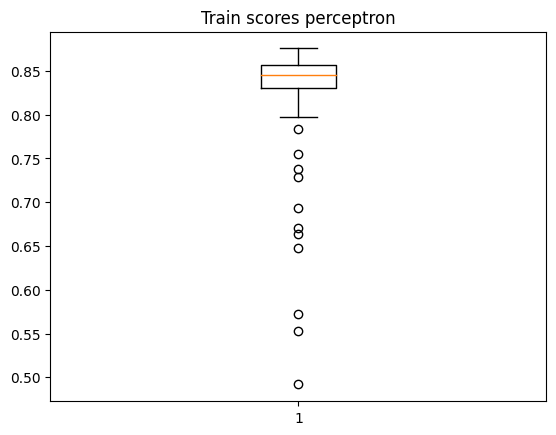

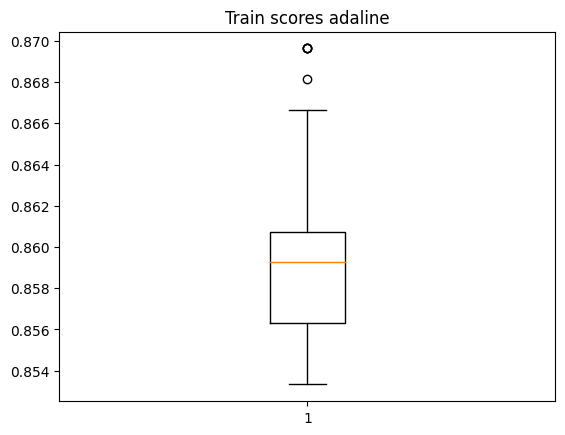

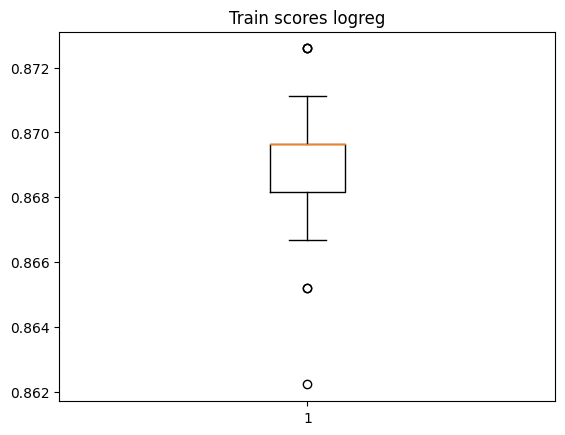

In [109]:
records = {a:[] for a in ["perceptron","adaline","logreg"]}

for i in range(100):
    for alg in ["perceptron","adaline","logreg"]:
        w=fit_linear(X_train_std,y_train,eta=.1,max_epochs=100,algorithm=alg)
        yhat = predict_linear(X_train_std,w,algorithm=alg)
        acc = (yhat==y_train).sum()/len(y_train)
        
        records[alg].append(acc)
for alg in ["perceptron","adaline","logreg"]:
    plt.title(f"Train scores {alg}")
    plt.boxplot(records[alg])
    plt.show()


/var/folders/ht/7rqyw9hs3fj63k5lvf08qhdh0000gn/T/ipykernel_10046/470687311.py:9: RuntimeWarning: overflow encountered in exp
  phi = lambda z: 1/(1+np.exp(-z))
/var/folders/ht/7rqyw9hs3fj63k5lvf08qhdh0000gn/T/ipykernel_10046/470687311.py:26: RuntimeWarning: overflow encountered in exp
  phi = lambda z: (1/(1+np.exp(-z)) >0.5)*1


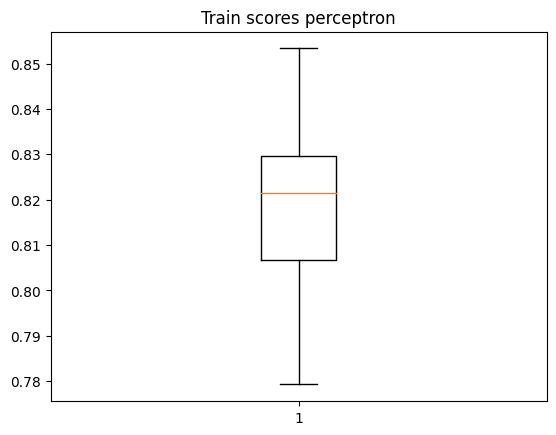

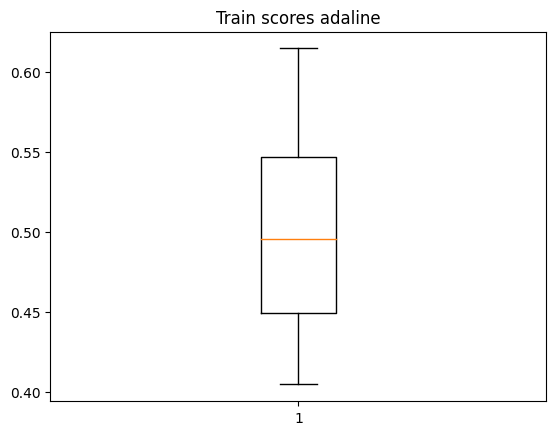

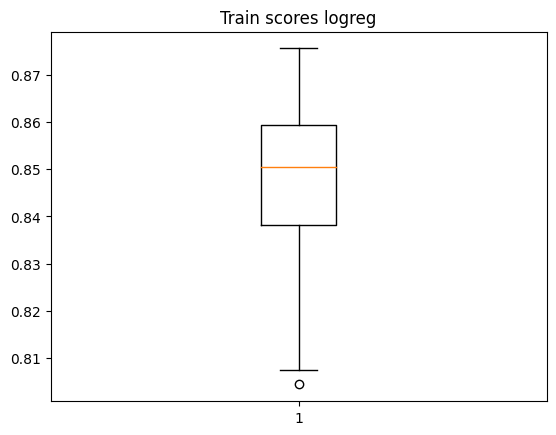

In [110]:
records = {a:[] for a in ["perceptron","adaline","logreg"]}
for i in range(100):
    for alg in ["perceptron","adaline","logreg"]:
        w=fit_linear(X_train_std,y_train,eta=.1,max_epochs=100,algorithm=alg,alpha=1)
        yhat = predict_linear(X_train_std,w,algorithm=alg)
        acc = (yhat==y_train).sum()/len(y_train)
        
        records[alg].append(acc)
for alg in ["perceptron","adaline","logreg"]:
    plt.title(f"Train scores {alg}")
    plt.boxplot(records[alg])
    plt.show()

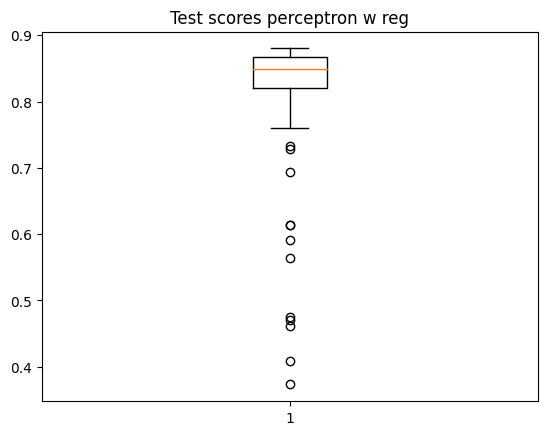

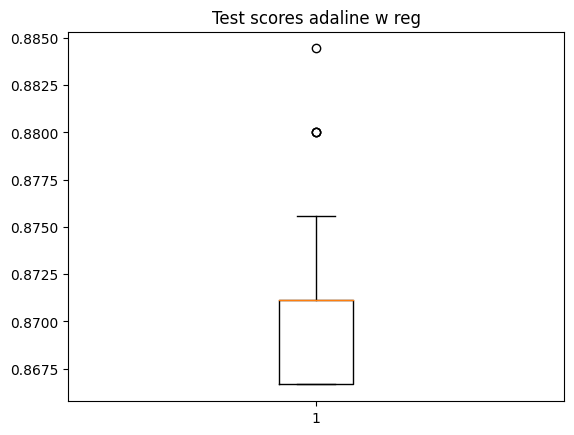

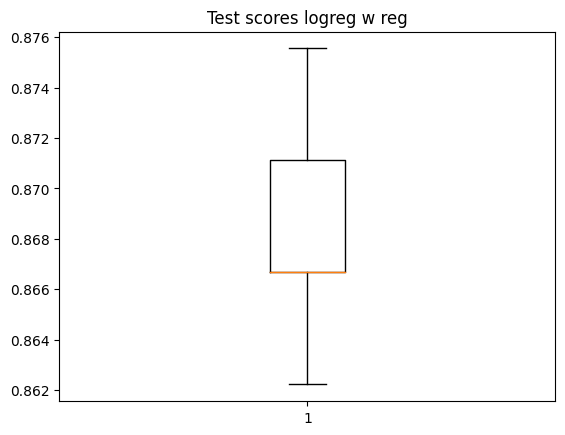

In [111]:
records = {a:[] for a in ["perceptron","adaline","logreg"]}

for i in range(100):
    for alg in ["perceptron","adaline","logreg"]:
        w=fit_linear(X_test_std,y_test,eta=.1,max_epochs=100,algorithm=alg,alpha=1/1000)
        yhat = predict_linear(X_test_std,w,algorithm=alg)
        acc = (yhat==y_test).sum()/len(y_test)
        
        records[alg].append(acc)
for alg in ["perceptron","adaline","logreg"]:
    plt.title(f"Test scores {alg} w reg")
    plt.boxplot(records[alg])
    plt.show()